In [1]:
## Import necessary library for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
## Load data in pandas df
df = pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks\Placement_Data.csv", index_col=0)
df.head(3)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0


### What column name refers to 

ssc_p:- Secondary Education(%) 10th Grade

ssc_b:- 10th Board of Education

hsc_p:- Higher Secondary Education(%) 12th Grade

hsc_b:- 12th Board of Education

hsc_s:- Specialization in Higher Secondary Education

degree_p:- Undergraduate (%)

degree_t:- Undergraduate degree type

workex:- Work experience

etest_p:- Placement test (%)

specialisation:- MBA specialisation

mba_p:- MBA (%)

status:- Hiring status    

In [3]:
## Check nan/missing values in each columns
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [4]:
## Check detail description about numeric variables 
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [5]:
## Check data type and shape of every column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 1 to 215
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 18.5+ KB


# Explanatory Data Analysis

### Plot histogram for all numeric variables

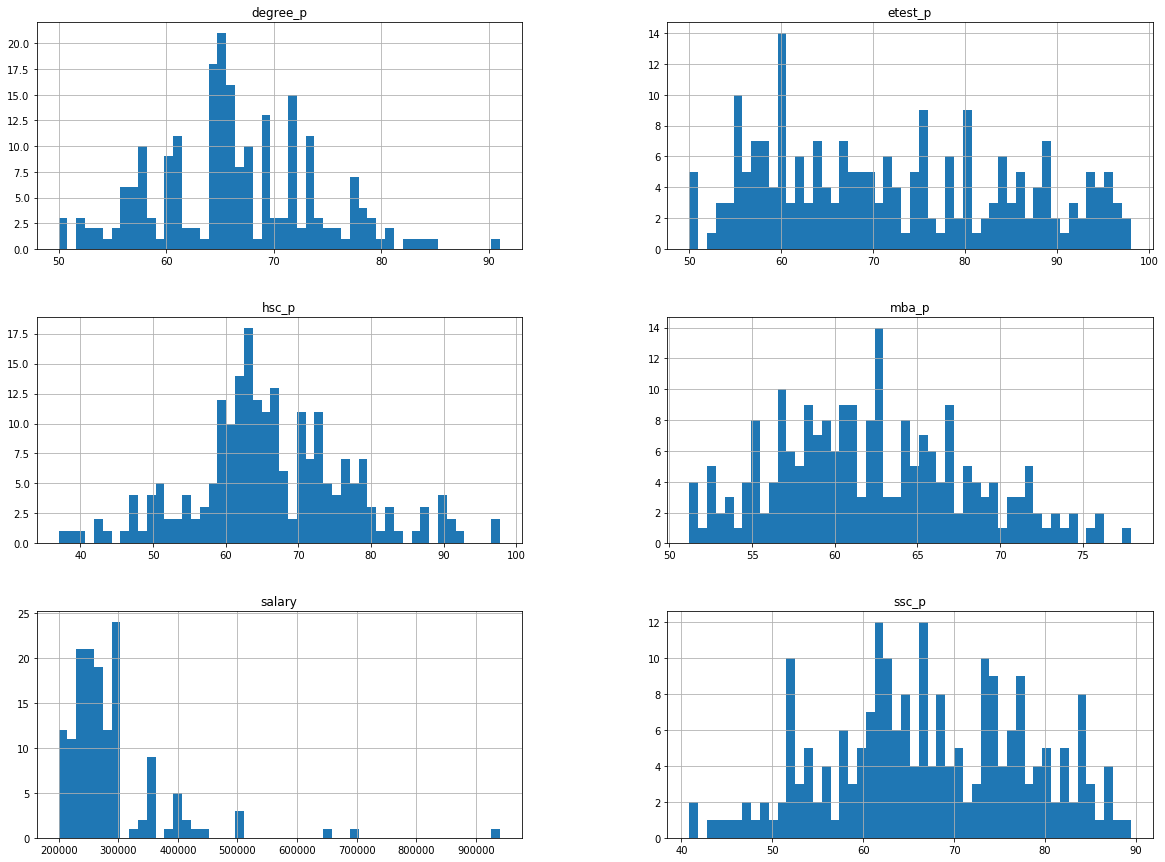

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### Find marginal probability through two way table

Marginal Probability is the probability of the occurence of the single event

In [7]:
## Marginal Probability beteween categorical variables status & specialisation
pd.crosstab(index = df['specialisation'], columns=df['status'], margins =True, normalize = True)

status,Not Placed,Placed,All
specialisation,,,
Mkt&Fin,0.116279,0.441860,0.55814
Mkt&HR,0.195349,0.246512,0.44186
All,0.311628,0.688372,1.00000


The marginal probability shows, out of 56% of Finance candidate 44% gets placed and in HR out of 44% only 24% gets placed that means the success ratio of MBA in Finance specialisation is more than the HR. Now find does work experience is a one of the factor of success for Finance candidate.

In [8]:
## Marginal Probability beteween categorical variables status & specialisation
pd.crosstab(index = df['specialisation'], columns=df['workex'], margins =True, normalize = 'columns')

workex,No,Yes,All
specialisation,,,
Mkt&Fin,0.489362,0.689189,0.55814
Mkt&HR,0.510638,0.310811,0.44186


Above margin probability table shows work experience plays an important role in success of MBA Finance candidate. 

In [9]:
## Marginal Probability beteween categorical variables status & workexperience (workex)
pd.crosstab(index = df['status'], columns=df['workex'], margins =True, normalize = 'columns')

workex,No,Yes,All
status,,,
Not Placed,0.404255,0.135135,0.311628
Placed,0.595745,0.864865,0.688372


According to campus data and above three marginal probability table shows having work experience is better to get placed. That means work experience factor influenced a candidate in getting placed thats why the of getting placed in a company is better for MBA Finance caandidate.

In [10]:
## Marginal Probability beteween categorical variables status & specialisation
pd.crosstab(index = df['degree_t'], columns=df['status'], margins =True, normalize =True)

status,Not Placed,Placed,All
degree_t,,,
Comm&Mgmt,0.200000,0.474419,0.674419
Others,0.027907,0.023256,0.051163
Sci&Tech,0.083721,0.190698,0.274419
All,0.311628,0.688372,1.000000


Commerce candidates getting more placed in companies but they are more in numbers as well but Science & Technology candiates have best ratio of getting placed from other undergraduate degree type.

#### According to college placement data & above pairplot clearly shows that percentage matters in placement of students in a XYZ campus.

### Which degree specialization is much demanded by corporate?

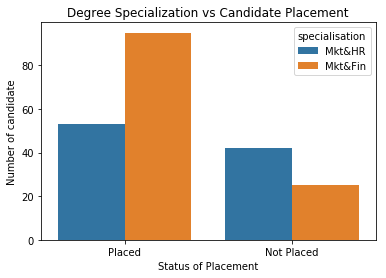

In [11]:
sns.countplot(x="status", data=df, hue='specialisation')
plt.title("Degree Specialization vs Candidate Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

#### Above plot shows Mkt&Fin specialization is dominating in campus, for placement.

### Now, check correlation of percentage in degree & ssc with repect to specialisation.

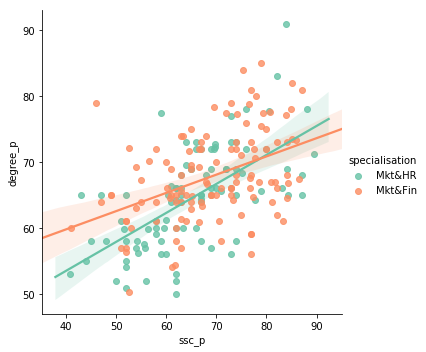

In [12]:
sns.lmplot(x='ssc_p', y='degree_p', data= df, hue ='specialisation', legend=True, palette="Set2")
plt.show()

### Does work experience affects placement of a candidate?

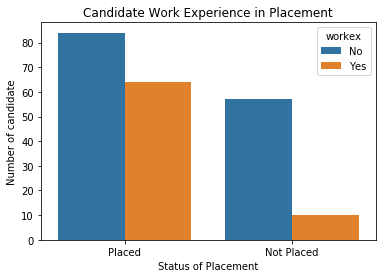

In [13]:
sns.countplot(x="status", data=df, hue='workex')
plt.title("Candidate Work Experience in Placement")
plt.xlabel("Status of Placement")
plt.ylabel("Number of candidate")
plt.show()

#### Acc. to data, most of candidates who have work experience are placed in a company. That means work experience is an important factor of getting placement.

### Find which degree technology studied by candidate is placed more 

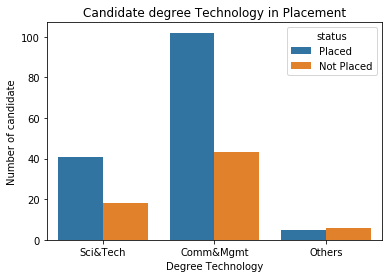

In [14]:
sns.countplot(x="degree_t", data=df, hue='status')
plt.title("Candidate degree Technology in Placement")
plt.xlabel("Degree Technology")
plt.ylabel("Number of candidate")
plt.show()

### Relationship between placement of a student to their percentage.

Pairwise Plot :- Used to plot relationship in a dataset

Creates scatter plots for join relationship and histogram for univariate distributions 


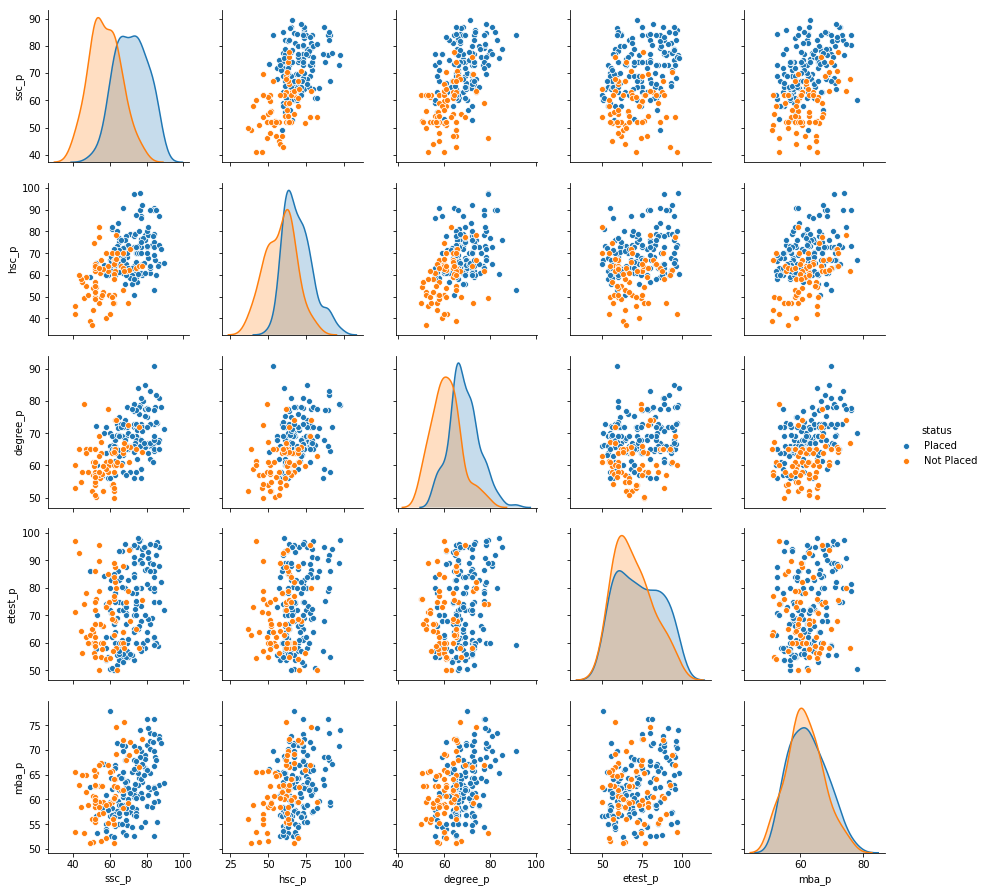

In [15]:
sns.pairplot(df.drop(["salary"], axis=1), kind="scatter", hue="status")
plt.show()

### Check average or mean of numeric variable for unique values of status 

In [16]:
df.groupby(["status"]).mean()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
status,,,,,,
Not Placed,57.544030,58.395522,61.134179,69.587910,61.612836,NaN
Placed,71.721486,69.926554,68.740541,73.238041,62.579392,288655.405405


#### Check how many students have been placed or not

In [17]:
df.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

### Create another dataframe of only placed students and analyse

In [18]:
## Create another dataframe of only placed students and check its shape 
df_placed = df.dropna(how="any")
df_placed.shape

(148, 14)

#### Create sub dataset of only numeric data type variables

In [19]:
numeric_data = df_placed.select_dtypes(exclude = [object])
numeric_data.shape

(148, 6)

### Salary distribution through box-whiskers plot & Histogram

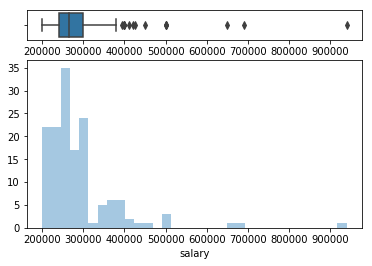

In [20]:
## Box whiskers plot & histogram on the same window 
## Split the plotting window into 2 parts

f, (ax_box, ax_hist)= plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
## Add and create  box plot
sns.boxplot(df_placed["salary"], ax=ax_box)

sns.distplot(df_placed["salary"], ax=ax_hist, kde=False)
plt.show()

### Find correlation between numeric variables in dataframe

Correlation :- Calculate relationship between two numerical variables.

Excluding null valuees & excluding the categorical variables to find the Pearson's correlation

• Positive correlation – the other variable has a tendency to also increase 

• Negative correlation – the other variable has a tendency to decrease

• No correlation – the other variable does not tend to either increase or decrease.

In [21]:
corr_matrix = numeric_data.corr()
corr_matrix

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.293416,0.380657,0.317892,0.430560,0.035330
hsc_p,0.293416,1.000000,0.221307,0.284672,0.329983,0.076819
degree_p,0.380657,0.221307,1.000000,0.217683,0.494093,-0.019272
etest_p,0.317892,0.284672,0.217683,1.000000,0.284143,0.178307
mba_p,0.430560,0.329983,0.494093,0.284143,1.000000,0.175013
salary,0.035330,0.076819,-0.019272,0.178307,0.175013,1.000000


Now, show the correlation matrix into heatmap for better understanding and visualization

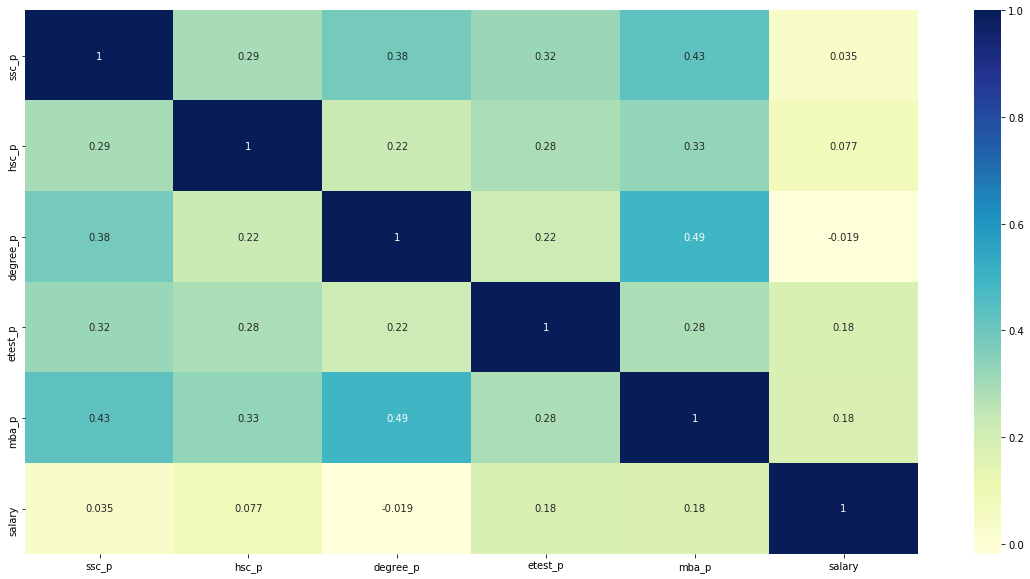

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

###### According to correlation matrix and its visualization in heatmaps, there is almost -ve correlation between undergraduate(%) and salary. The salary variable only shows (+ve) correlation with MBA(%) & placement test(%) . And maximum positive coorelation will be shown between undergraduate(%) and MBA(%).  
##### In the heatmap of correlation matrix the darker the color of tile the correlation between the variables is highly positive.And lighter the color of tile the correlation between the variables is highly negative.

In [23]:
## Variance Infilation Factor 
X = numeric_data.drop(columns=['salary','mba_p',], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

   features  vif_factor
0     ssc_p   84.047282
1     hsc_p   59.557172
2  degree_p   88.344621
3   etest_p   34.485071


### Find does gender of an student affects the salary or any other variable

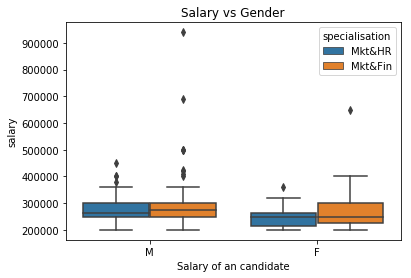

In [24]:
## Box and whiskers plot is very useful to find relationship between numerical & categorical variable.

sns.boxplot(x=df_placed['gender'], y = df_placed['salary'], hue='specialisation', data=df_placed)
plt.title("Salary vs Gender")
plt.xlabel("Gender of an candidate")
plt.xlabel("Salary of an candidate")
plt.show()

###### According to above box-whiskers plot the outliners or extreme value in salary column lie more in male category than female. One of assumptions is may be some of the male candidates getting hire for higher post in a company thats why they are getting more salary.

#### Pairplot of gender variable

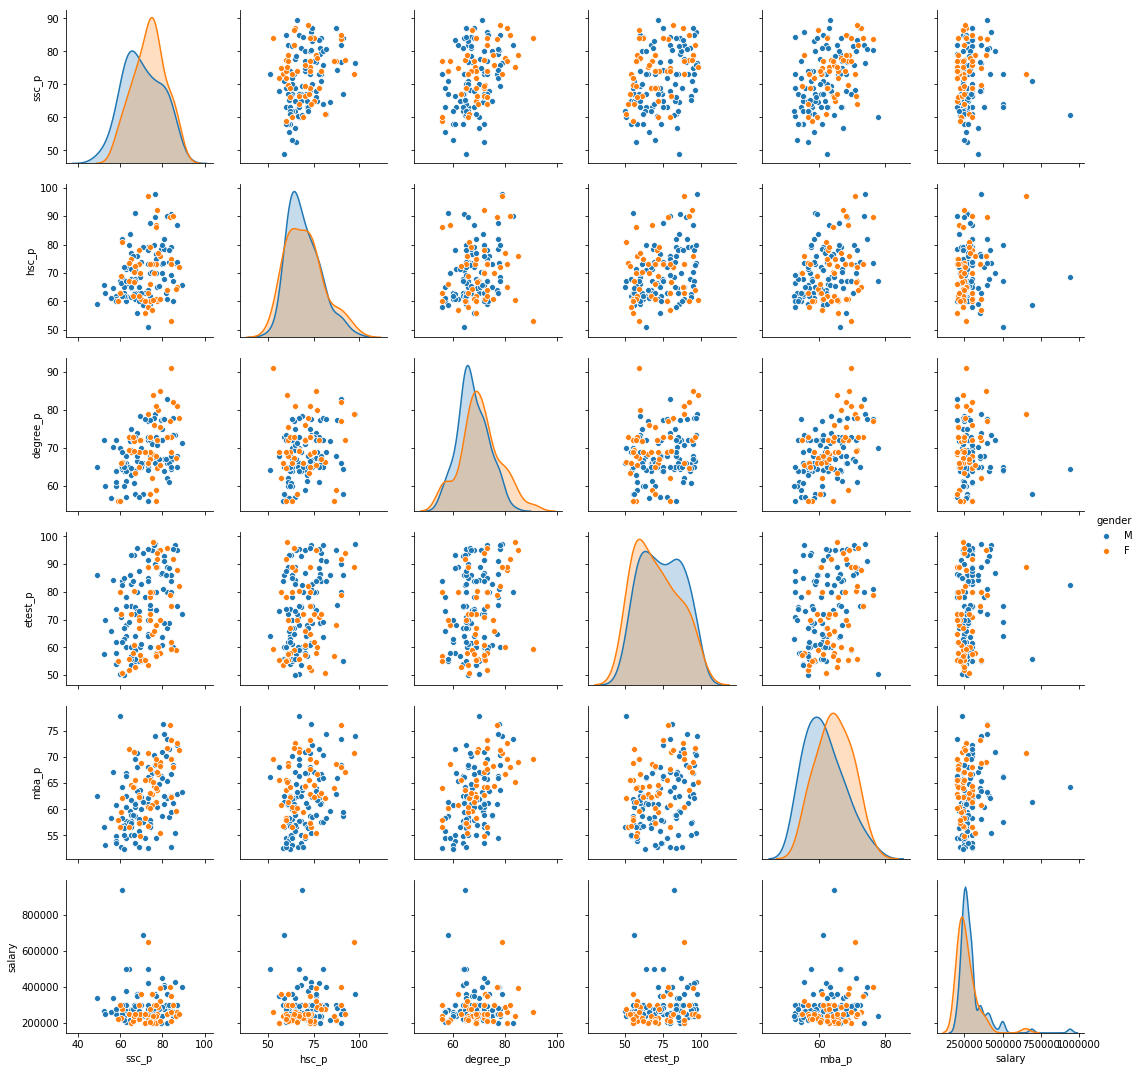

In [25]:
sns.pairplot(df_placed, kind="scatter", hue="gender")
plt.show()

### Find relationship between degree specialization and other variables of placed student.

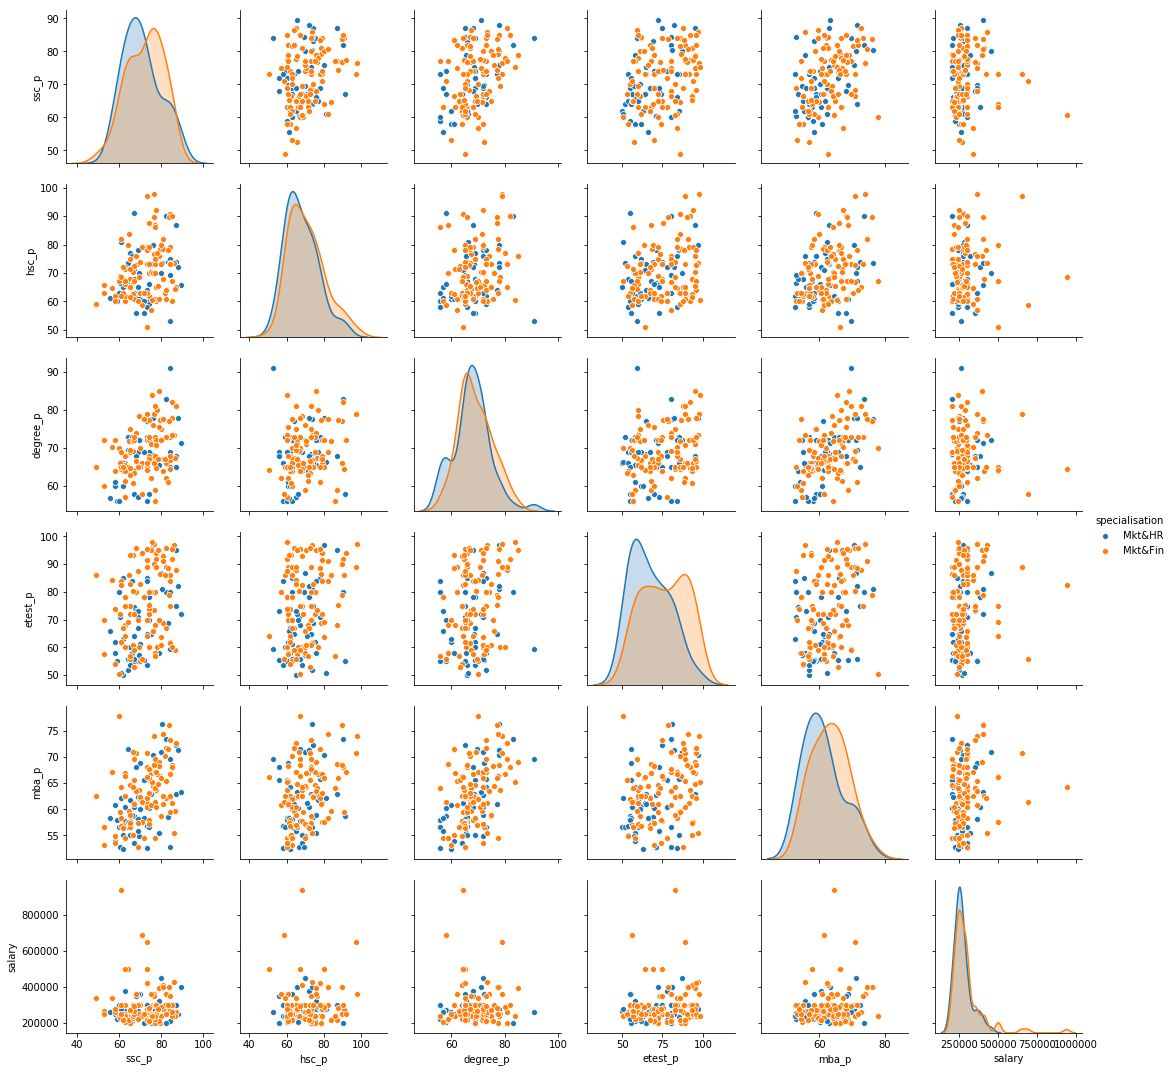

In [26]:
sns.pairplot(df_placed, kind="scatter", hue="specialisation")
plt.show()

# Model Development :-  Salary Prediction

#### Now, build a Linear Regression and Random Forest Model on placed dataframe only.

In [27]:
df_predict = df_placed.copy()
df_predict.shape

(148, 14)

In [28]:
df_predict.drop(columns='status', axis=1, inplace=True)
df_predict.shape

(148, 13)

In [29]:
## Converting categorical variables to dummy variables
##df_predict=pd.get_dummies(df_placed, drop_first=True)
df_predict = pd.get_dummies(df_predict, columns=['gender', 'ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation'])
df_predict.shape

(148, 22)

In [30]:
df_predict.head(3)

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR
sl_no,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1
2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,...,0,0,1,0,0,1,0,1,1,0
3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,...,1,0,0,1,0,0,1,0,1,0


In [31]:
## Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

### MODEL BUILDING

In [32]:
## Separating input and output features
x1 = df_predict.drop(['salary'], axis='columns', inplace=False)
y1 = df_predict['salary']

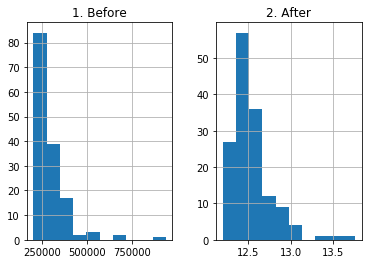

In [33]:
prices =pd.DataFrame({"1. Before":y1, "2. After":np.log(y1)})
prices.hist()
plt.show()

In [34]:
## Transform price as a logarithmic value
y1 =np.log(y1)

#### Splitting data into test and train to fit model & predict. Train set contains 70% data because test_size =0.3 and random state is a predefined algorithm its called pseudo random number generato

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state = 3)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(111, 21) (37, 21) (111,) (37,)


### BASELINE MODEL FOR OMITTED DATA

WE are making a base model by using test data mean value. This is to set a benchmark and to compare with our regression model.

In [36]:
## Finding the mean for test data value
base_pred =np.mean(y_test)
print(base_pred)

12.59766592491473


In [37]:
## Representing some value till length of test data
base_pred = np.repeat(base_pred, len(y_test))

In [38]:
## Finding the RMSE(Root Mean Squared Error)
## RMSE computes the difference between the test value and the predicted value and squared them and divides them by number of samples.

base_root_mean_square_error = np.sqrt(mean_squared_error(y_test, base_pred))
print(base_root_mean_square_error)

0.31505127155864865


### LINEAR REGRESSION WITH PLACED DATA

In [39]:
## Setting intercept as true
lgr = LinearRegression(fit_intercept =True)

In [40]:
## MODEL
model_lin1 = lgr.fit(x_train, y_train)

In [41]:
## Predicting model on test set
salary_predictions_lin1 = lgr.predict(x_test)

In [42]:
## Computing MSE and RMSE
lin_mse1 = mean_squared_error(y_test, salary_predictions_lin1)
lin_rmse1 = np.sqrt(lin_mse1)
print(lin_rmse1)

0.3251875499611168


In [43]:
## R squared value
r2_lin_test1 = model_lin1.score(x_test, y_test)
r2_lin_train1 = model_lin1.score(x_train, y_train)
print(r2_lin_test1, r2_lin_train1)

-0.06538197892122977 0.2516045679357909


count    37.000000
mean      0.059900
std       0.324032
min      -0.305846
25%      -0.133866
50%      -0.041654
75%       0.113153
max       1.169814
Name: salary, dtype: float64

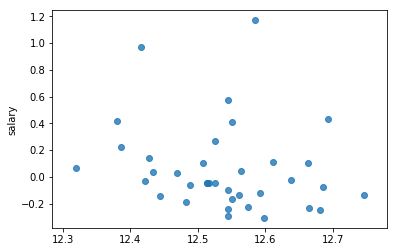

In [44]:
## Regression diagnostics :- Resident plot analysis
## It is differnce test data and your prediction. It is just difference between actual & predicted value.
residuals1 = y_test - salary_predictions_lin1
sns.regplot(x = salary_predictions_lin1, y=residuals1, scatter=True, fit_reg=False, data=df_placed)
residuals1.describe()

### RANDOM FOREST

In [45]:

## MODEL PARAMETERS
rf = RandomForestRegressor(n_estimators = 100, max_features='auto', max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [46]:
## MODEL
model_rf1 =rf.fit(x_train, y_train)

In [47]:
## Predicting model on test set
salary_predictions_rf1 = rf.predict(x_test)

In [48]:
## Computing MSE and RSME
rf_mse1 = mean_squared_error(y_test, salary_predictions_rf1)
rf_rmse1 = np.sqrt(rf_mse1)
print(rf_rmse1)

0.3161012915271862


In [49]:
## R Squared value
r2_rf_test1 = model_rf1.score(x_test, y_test)
r2_rf_train1 = model_rf1.score(x_train, y_train)
print(r2_rf_test1, r2_rf_train1)

-0.006676816412072073 0.5441726409828543
